In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
data_dir = ('./datasets/flower_photos')
data_dir

'./datasets/flower_photos'

Navigate and convert to windows file paths

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('datasets/flower_photos')

List down first file files from the dataset filepath

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]


[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

Perform data visualization

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

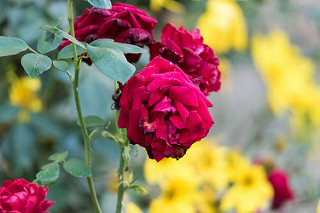

In [13]:
import PIL
PIL.Image.open(str(roses[71]))

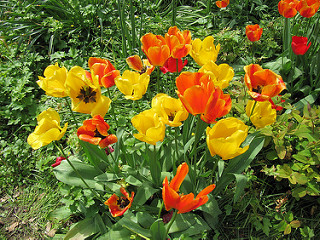

In [16]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[120]))

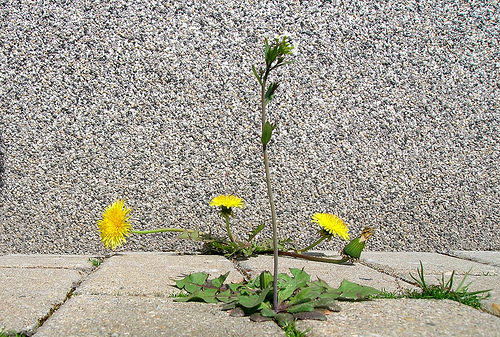

In [19]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[40]))

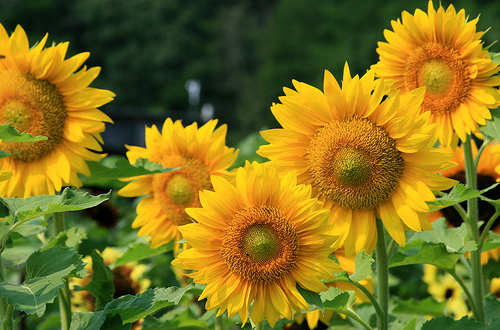

In [20]:
sunflower = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflower[0]))

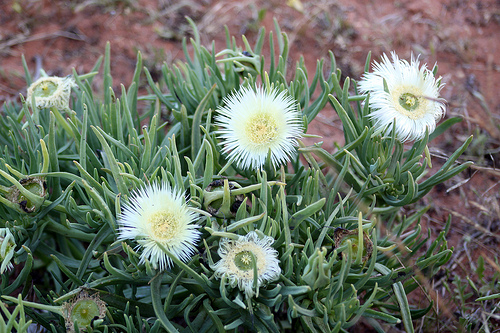

In [22]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[11]))

Read flowers images from disk into numpy array using opencv

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
print(flowers_labels_dict)

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}


In [11]:

flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [38]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

Create X And Y

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

Train test split

In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Build convolutional neural network and train it

In [44]:
num_classes = 5

model = keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)           

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.4578 - loss: 1.3014
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - accuracy: 0.6097 - loss: 1.0077
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.6857 - loss: 0.8289
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.7624 - loss: 0.6588
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 294ms/step - accuracy: 0.8140 - loss: 0.4846
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 321ms/step - accuracy: 0.9030 - loss: 0.2987
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.9462 - loss: 0.1710
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.9680 - loss: 0.1158
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.9800 - loss: 0.0754
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - accuracy: 0.9738 - loss: 0.0802
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9862 - loss: 0.0518
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21

In [45]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6732 - loss: 2.5041


[2.504077672958374, 0.673202633857727]

Observations:
while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting.

Perform some predictions

In [46]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step


array([[ 10.112826  ,  24.623613  ,  -4.242503  , -24.060656  ,
         -2.3545468 ],
       [ 10.431331  ,   1.0512968 , -11.791059  , -10.268444  ,
          3.1118596 ],
       [  1.3084321 ,   5.997412  ,  16.234125  , -14.205999  ,
         -6.4357452 ],
       ...,
       [  0.5121026 ,  -5.9503527 , -14.436052  ,   0.35176206,
          2.1663146 ],
       [  3.0767424 ,  -1.1936704 ,   7.9000053 ,  -8.43279   ,
         -3.2050102 ],
       [ -2.5654318 , -20.113968  ,  -0.3541004 ,   4.832973  ,
          0.6689882 ]], shape=(918, 5), dtype=float32)

In [47]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

np.int64(1)

In [48]:
y_test[0]

np.int64(1)

Improve Test Accuracy Using Data Augmentation

In [19]:
img_height = 180
img_width = 180
batch_size = 32

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("vertical", 
                     input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

c:\Users\ogech\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Original Image

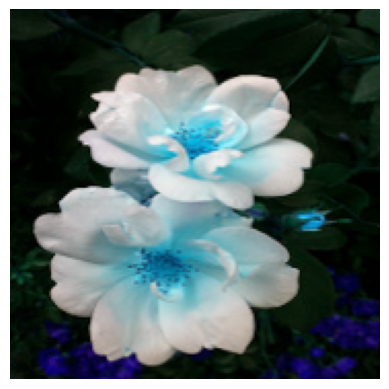

In [52]:
plt.axis('off')
plt.imshow(X[0])

Newly generated training sample using data augmentation

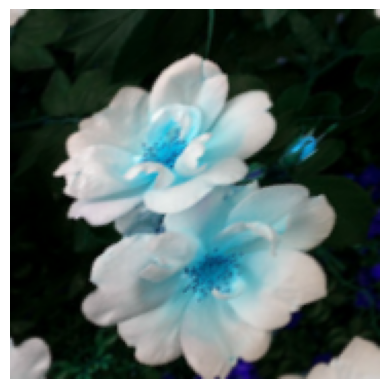

In [55]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer

In [23]:
num_classes = 5

model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=32, batch_size=32)    

Epoch 1/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 163ms/step - accuracy: 0.3914 - loss: 1.4370
Epoch 2/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.5690 - loss: 1.0916
Epoch 3/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - accuracy: 0.5890 - loss: 1.0144
Epoch 4/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.6217 - loss: 0.9396
Epoch 5/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.6414 - loss: 0.9175
Epoch 6/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.6512 - loss: 0.8761
Epoch 7/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.6617 - loss: 0.8608
Epoch 8/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - accuracy: 0.6755 - loss: 0.8285
Epoch 9/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.6922 - loss: 0.7991
Epoch 10/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.7118 - loss: 0.7533
Epoch 11/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - accuracy: 0.7024 - loss: 0.7417
Epoch 12/32
86/86 ━━━━━━━━━━━━━━━━━━━━ 13

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6972 - loss: 0.9720


[0.9719700813293457, 0.6971677541732788]